# BUSINESS PROBLEM

**create a predictive model,which can predict whether the person is diabetic or not**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
continous = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

discrete_count = ["Pregnancies"]

discrete_categorical = ["Outcome"]

**exploratory data analysis**

In [8]:
df[continous].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<function matplotlib.pyplot.show(close=None, block=None)>

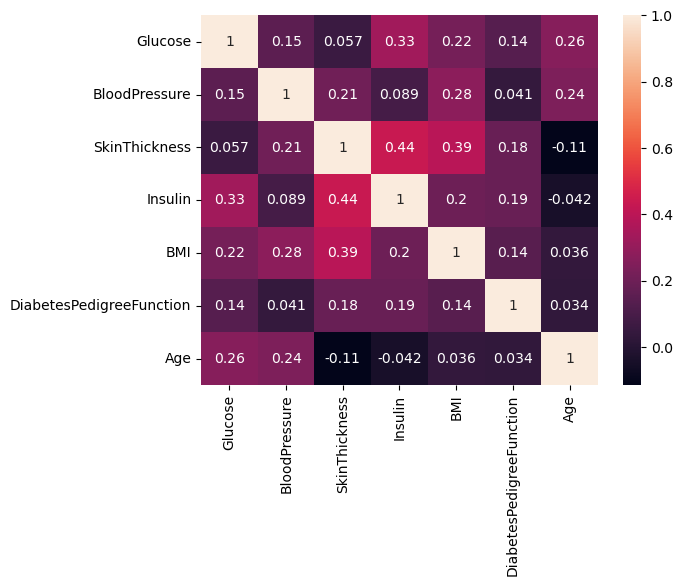

In [9]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show

**data cleaning**

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**data wrangling**

In [11]:
#no encoding required

**X & y**

In [12]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

**Train Test split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,1:8] = sc.fit_transform(X_train.iloc[:,1:8])
X_test.iloc[:,1:8] = sc.transform(X_test.iloc[:,1:8])

# modelling

**Logistic regression (Baseline model)**

In [15]:
#modelling

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

# evaluation

**train**

In [24]:
#prediction
ypred_train = log_reg.predict(X_train)

#train accuracy 
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train,ypred_train))

#cross validation score
from sklearn.model_selection import cross_val_score
print("Cross_val_Score:",cross_val_score(log_reg,X_train,y_train,cv=5,scoring="r2"))

Train accuracy: 0.7719869706840391
Cross_val_Score: [-0.16772152 -0.43023256  0.10610465  0.07034884 -0.00559317]


**test**

In [31]:
ypred_test = log_reg.predict(X_test)
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Test accuracy: 0.8181818181818182


**confusion matrix**

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[95,  7],
       [21, 31]], dtype=int64)

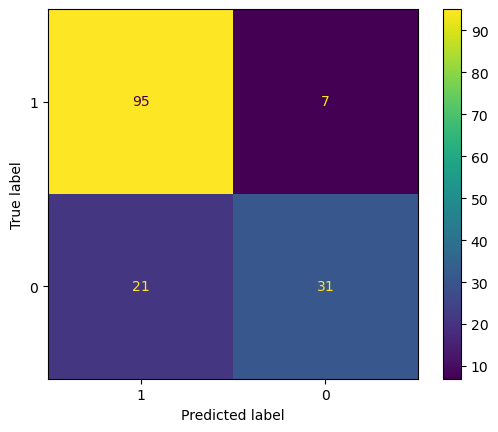

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df["Outcome"].unique()).plot()

plt.show()

**classification report**

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       102
           1       0.82      0.60      0.69        52

    accuracy                           0.82       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154



**ROC CURVE**

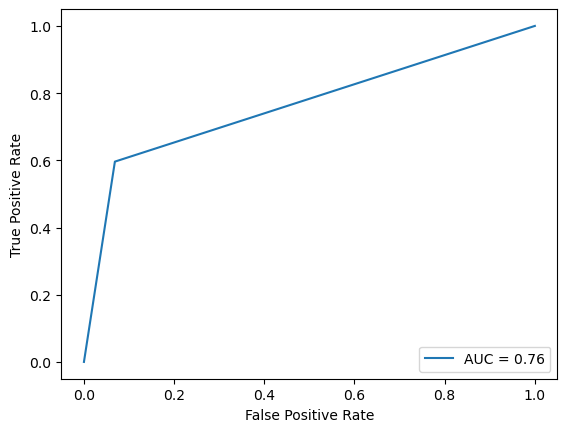

In [32]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()
plt.show()


**AUC score**

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7637631975867271